In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
image = cv2.imread('image.png')
img = mpimg.imread('image.png')

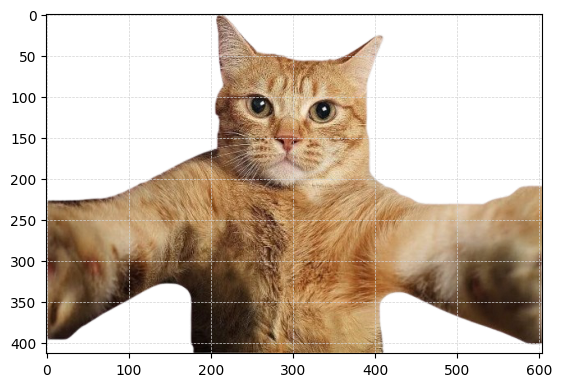

In [3]:
plt.imshow(img, cmap='gray')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.5)
plt.show()



In [55]:

? cv2.imread


In [59]:
k = image @ np.diag(np.array([1, 5, 1]))
k


array([[[   0,    0,    0],
        [   0,    0,    0],
        [   0,    0,    0],
        ...,
        [   0,    0,    0],
        [   0,    0,    0],
        [   0,    0,    0]],

       [[   0,    0,    0],
        [   0,    0,    0],
        [   0,    0,    0],
        ...,
        [   0,    0,    0],
        [ 255, 1275,  255],
        [ 255, 1275,  255]],

       [[   0,    0,    0],
        [   0,    0,    0],
        [ 255, 1275,  255],
        ...,
        [   0,    0,    0],
        [   0,    0,    0],
        [   0,    0,    0]],

       ...,

       [[   0,    0,    0],
        [   0,    0,    0],
        [   0,    0,    0],
        ...,
        [   0,    0,    0],
        [   0,    0,    0],
        [   0,    0,    0]],

       [[   0,    0,    0],
        [   0,    0,    0],
        [ 255, 1275,  255],
        ...,
        [   0,    0,    0],
        [   0,    0,    0],
        [   0,    0,    0]],

       [[   0,    0,    0],
        [   0,    0,    0],
        [   0,  

In [4]:
def img_shape_correction(array):
    H, W, C = array.shape
    differ = W - H
    k = np.pad(img, mode = 'constant', pad_width=((differ, 0), (0, 0), (0, 0))) if differ >= 0 else np.pad(img, mode = 'constant', pad_width=((0, 0), (0, -differ), (0, 0)))
    return k


In [87]:
def img_3d_to_2d(array):
    # array = img_shape_correction(array)
    H, W, C = array.shape
    x = np.tile(np.arange(W), H)
    y = np.repeat(np.arange(H), W)
    rgb = array.reshape(H * W, C)
    r = rgb[:, 0]
    g = rgb[:, 1]
    b = rgb[:, 2]
    t = rgb[:, 3]
    output_array = np.stack([
        x, y, r, g, b, t
    ])
    return output_array

In [122]:
def vizualization_2d(array):
    colors = np.stack([array[2], array[3], array[4], array[5]], axis=1)
    plt.scatter(
        array[0],
        array[1],
        c=colors,
        s=10
    )
    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.show()

In [25]:
def img_2d_to_3d(array):
    size = array[0][-1].astype(np.int32) + 1
    shape_3d = (size, size, 4)
    row = array[0, :].astype(np.int32)
    column = array[1, :].astype(np.int32)
    r = array[2, :]
    g = array[3, :]
    b = array[4, :]
    t = array[5, :]
    array_3d = np.zeros(shape_3d, dtype= r.dtype)
    array_3d[row, column, 0] = r
    array_3d[row, column, 1] = g
    array_3d[row, column, 2] = b
    array_3d[row, column, 3] = t
    return array_3d


In [80]:
def stretch(X,a,b):
    X = X if len(X.shape) == 2 else img_3d_to_2d(X)
    return np.diag(np.array([a, b, 1, 1, 1, 1 ])) @ X

In [106]:
def shear(X,a,b):
    X = X if len(X.shape) == 2 else img_3d_to_2d(X)
    M = np.eye(6, dtype=float)
    M[0, 1] = a
    M[1, 0] = b
    return M @ X


In [111]:
def rotation(X, teta):
    X = X if len(X.shape) == 2 else img_3d_to_2d(X)
    angle = np.cos(np.deg2rad(teta))
    M = np.diag(np.array([np.cos(angle), np.cos(angle), 1, 1, 1, 1 ]))
    M[0, 1] = - np.sin(angle)
    M[1, 0] = np.sin(angle)
    return M @ X

In [132]:
def reflection(X,a,b):
    X = X if len(X.shape) == 2 else img_3d_to_2d(X)
    M = np.diag(np.array([a**2 - b**2, b**2 - a**2, 1, 1, 1, 1 ]))
    M[0, 1] = 2*a*b
    M[1, 0] = 2*a*b
    M[0:2, 0:2] = (1/(a**2 + b**2)) * M[0:2, 0:2]
    return M @ X


In [88]:
k = img_3d_to_2d(img)

In [78]:
q = (np.diag(np.array([1.5, 2, 1, 1, 1, 1 ])) @ k)

In [130]:
M = np.eye(6, dtype=float)
M[0, 1] = 5
M[1, 0] = 6
M[0:2, :]


array([[1., 5., 0., 0., 0., 0.],
       [6., 1., 0., 0., 0., 0.]])

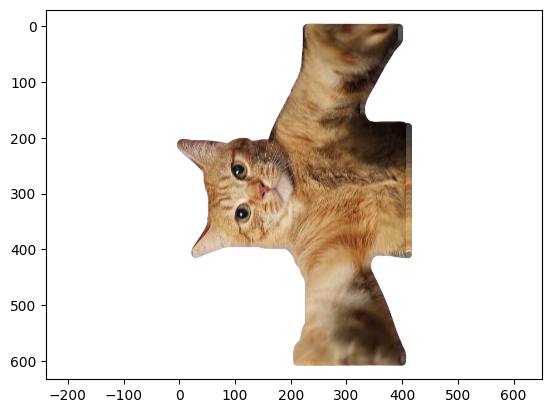

In [133]:
vizualization_2d(reflection(k, 1, 1))
